In [64]:
import netCDF4 as nc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics
import scipy
import datetime

## Load WRF data

In [ ]:
wname = 'wrf27vmixing.csv'
wrf = pd.read_csv(wname,parse_dates=['date'])
wrf.sort_values('date', inplace=True)
# convert to local time
wrf['local'] = wrf['date'] - datetime.timedelta(hours=4)

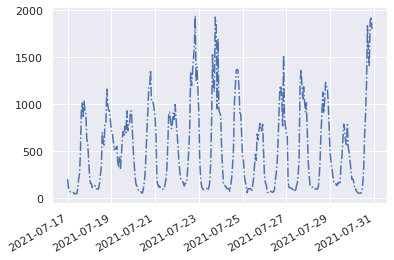

In [76]:
sns.set()
plt.plot(wrf.date.values, wrf.MixHgt.values,'-.')
fig = plt.gcf()
fig.autofmt_xdate()
plt.show()

## Load LiDAR data

In [23]:
path_day = "../FXD20210719/"
time_day = np.array([])
cnr_day = np.array([])
relat_beta_day = np.array([])
spectral_width_day = np.array([])
atm_structures = np.array([])
ver_wind_speed = np.array([])
for file in sorted(os.listdir(path_day)):
    #skips dummy files
    if file != '.DS_Store':
        data = nc.Dataset(path_day + file , mode ='r')#this will open the netCDF data
        
        #gets the name of the group that contains the data as it changes in every file
        sweep_file = data[list(data.groups.keys())[1]]
        
        #THE [:] IS NEEDED TO GET ALL THE VALUES
        dumm_cnr = sweep_file.variables['cnr'][:]
        dumm_time= sweep_file.variables['time'][:]
        dumm_rela_beta = sweep_file.variables["relative_beta"][:]
        dumm_spectral = sweep_file.variables["doppler_spectrum_width"][:]
        dum_struct = sweep_file.variables["atmospherical_structures_type"][:]
        dumm_wind = sweep_file.variables["radial_wind_speed"][:]
        #appending all the values into one numpy array
        cnr_day = np.append(cnr_day, dumm_cnr)
        time_day =np.append(time_day,dumm_time)
        relat_beta_day= np.append(relat_beta_day, dumm_rela_beta)
        spectral_width_day = np.append(spectral_width_day, dumm_spectral)
        atm_structures  = np.append(atm_structures, dum_struct)
        ver_wind_speed = np.append(ver_wind_speed, dumm_wind)
#converts time from epoch to current local time
time =(pd.to_datetime(time_day, unit = 's'))
columns = (np.array([i for i in range(200, 5200, 100)])).astype(str)
#tranforming the arrays into a dataframe
df_cnr = pd.DataFrame(np.flip((cnr_day)).reshape(int(len(cnr_day)/50),50), columns = np.flip(columns), index = np.flip(time.round('S')))

#df_beta = pd.DataFrame(np.flip((relat_beta_day)).reshape(int(len(cnr_day)/50),50), columns = np.flip(columns), index = np.flip(time.round('S')))
#df_spectralWidth = pd.DataFrame(np.flip((spectral_width_day)).reshape(int(len(cnr_day)/50),50), columns = np.flip(columns), index = np.flip(time.round('S')))

<ipython-input-23-27b854284afd>:17: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dumm_cnr = sweep_file.variables['cnr'][:]
<ipython-input-23-27b854284afd>:18: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dumm_time= sweep_file.variables['time'][:]
<ipython-input-23-27b854284afd>:19: DeprecationWarning: `np.bool` is a deprecated alias for the built

Selects the PBL values calculated by the LiDAR

In [24]:
df_structures = pd.DataFrame(np.flip((atm_structures )).reshape(int(len(atm_structures)/50),50), columns = np.flip(columns), index = np.flip(time.round('S')))
df_structures.head()

,5100,5000,4900,4800,4700,4600,4500,4400,4300,4200,...,1100,1000,900,800,700,600,500,400,300,200
2021-07-19 23:57:23,0.0,0.0,0.0,0.0,0.0,0.0,20.0,20.0,20.0,20.0,...,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0
2021-07-19 23:57:22,0.0,0.0,0.0,0.0,0.0,0.0,20.0,20.0,20.0,20.0,...,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0
2021-07-19 23:57:21,0.0,0.0,0.0,0.0,0.0,0.0,20.0,20.0,20.0,20.0,...,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0
2021-07-19 23:57:20,0.0,0.0,0.0,0.0,0.0,0.0,20.0,20.0,20.0,20.0,...,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0
2021-07-19 23:57:19,0.0,0.0,0.0,0.0,0.0,0.0,20.0,20.0,20.0,20.0,...,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0


Creates a copy of teh CNR data frame

In [25]:
df_cnr_cop = df_cnr.reset_index()

In [26]:
df_cnr_cop.head()

,index,5100,5000,4900,4800,4700,4600,4500,4400,4300,...,1100,1000,900,800,700,600,500,400,300,200
0,2021-07-19 23:57:23,-34.26,-32.40,-32.97,-33.62,-33.00,-33.04,-29.28,-27.45,-26.54,...,-7.06,-7.63,-8.65,-10.17,-12.15,-13.34,-14.95,-16.30,-17.09,-18.14
1,2021-07-19 23:57:22,-32.32,-31.06,-33.73,-32.19,-35.84,-32.39,-27.91,-26.88,-26.40,...,-7.18,-7.89,-8.88,-10.47,-12.34,-13.57,-14.97,-16.25,-17.02,-17.93
2,2021-07-19 23:57:21,-32.46,-32.01,-33.66,-32.45,-31.80,-34.17,-28.96,-27.92,-25.63,...,-7.08,-7.79,-8.87,-10.29,-12.20,-13.56,-14.90,-16.28,-17.14,-17.98
3,2021-07-19 23:57:20,-34.17,-32.98,-32.31,-32.31,-30.78,-34.91,-30.43,-27.41,-27.04,...,-7.16,-7.85,-8.82,-10.21,-12.23,-13.50,-15.00,-16.17,-16.99,-17.90
4,2021-07-19 23:57:19,-33.57,-31.98,-32.05,-33.71,-30.37,-34.42,-28.87,-26.96,-27.10,...,-7.18,-7.88,-8.88,-10.35,-12.24,-13.41,-14.92,-16.08,-16.97,-17.85


Calculates the PBL Height based on the maximum of the variance from the CNR per hour

In [27]:
def pbl_heigth(df):
    std_dict = {}
    i =  0

    for heigth in df.columns[1:]:
       
        
        if df['index'][i].date() ==  pd.Timestamp("2021-07-19"):
            std_series = df.resample("H", on='index')[heigth].std()
            if i ==0:
                std_dict['time'] = np.array(std_series.index)
            i +=1
            std_dict[heigth] = []
            for std in std_series:
                std_dict[heigth].append(std)
       
        
        else: 
            i+=1
        
        
    height_= 0
    
    stdMax = (std_dict['200'][0])
    pbl_h = []
    for k in range(len(std_dict['5100'])):
        for h in std_dict.keys():
            if h != 'time':
    
                current_std = std_dict[h][k]

                if current_std > stdMax:
                    height_ = h
        pbl_h.append(height_)

    std_dict['PBL_H_CNR'] = pbl_h
    
    return pd.DataFrame(std_dict)

In [28]:
pblh = pbl_heigth(df_cnr_cop)
pblh['PBL_H_CNR']= pblh['PBL_H_CNR'].astype(int)
pblh.head()

,time,5100,5000,4900,4800,4700,4600,4500,4400,4300,...,1000,900,800,700,600,500,400,300,200,PBL_H_CNR
0,2021-07-19 00:00:00,1.509589,1.460205,1.510010,1.507158,1.482492,1.509635,1.521768,1.557244,1.476305,...,13.602090,9.095275,11.456254,7.551852,1.638069,1.066806,0.840376,0.753872,0.701313,300
1,2021-07-19 01:00:00,1.511393,1.470897,1.548378,1.490823,1.575382,1.502351,1.514805,1.550193,1.460266,...,11.723904,9.503248,13.309827,14.876480,9.453065,1.634914,0.666557,0.551071,0.522401,500
2,2021-07-19 02:00:00,1.666474,1.542871,1.560356,1.523212,1.487482,1.491648,1.491146,1.542160,1.504092,...,14.112591,10.121723,12.896419,15.195426,14.552101,8.352056,2.082634,1.480460,1.253267,200
3,2021-07-19 03:00:00,1.460962,1.527962,1.522566,1.487836,1.461951,1.507512,1.488042,1.530764,1.521737,...,12.342624,13.968056,8.616932,3.837241,3.494873,1.589952,0.699871,0.496376,0.464902,500
4,2021-07-19 04:00:00,1.564285,1.512087,1.419268,1.509273,1.546711,1.493912,1.523514,1.504102,1.482784,...,13.289195,13.374966,11.710391,14.983990,7.656226,0.727065,0.520416,0.478007,0.488224,500


The height per hour

In [29]:
print(pblh[["time", "PBL_H_CNR"]])

                  time  PBL_H_CNR
0  2021-07-19 00:00:00        300
1  2021-07-19 01:00:00        500
2  2021-07-19 02:00:00        200
3  2021-07-19 03:00:00        500
4  2021-07-19 04:00:00        500
5  2021-07-19 05:00:00        500
6  2021-07-19 06:00:00        300
7  2021-07-19 07:00:00        200
8  2021-07-19 08:00:00        200
9  2021-07-19 09:00:00        200
10 2021-07-19 10:00:00        400
11 2021-07-19 11:00:00        500
12 2021-07-19 12:00:00        200
13 2021-07-19 13:00:00        300
14 2021-07-19 14:00:00        200
15 2021-07-19 15:00:00        200
16 2021-07-19 16:00:00        200
17 2021-07-19 17:00:00        200
18 2021-07-19 18:00:00        200
19 2021-07-19 19:00:00        200
20 2021-07-19 20:00:00        200
21 2021-07-19 21:00:00        200
22 2021-07-19 22:00:00       1300
23 2021-07-19 23:00:00       1700


In [30]:
pblh['PBL_H_CNR'] = pblh['PBL_H_CNR'].replace([1300, 1700], pblh['PBL_H_CNR'].mean())
print(pblh[["time", "PBL_H_CNR"]])

                  time   PBL_H_CNR
0  2021-07-19 00:00:00  300.000000
1  2021-07-19 01:00:00  500.000000
2  2021-07-19 02:00:00  200.000000
3  2021-07-19 03:00:00  500.000000
4  2021-07-19 04:00:00  500.000000
5  2021-07-19 05:00:00  500.000000
6  2021-07-19 06:00:00  300.000000
7  2021-07-19 07:00:00  200.000000
8  2021-07-19 08:00:00  200.000000
9  2021-07-19 09:00:00  200.000000
10 2021-07-19 10:00:00  400.000000
11 2021-07-19 11:00:00  500.000000
12 2021-07-19 12:00:00  200.000000
13 2021-07-19 13:00:00  300.000000
14 2021-07-19 14:00:00  200.000000
15 2021-07-19 15:00:00  200.000000
16 2021-07-19 16:00:00  200.000000
17 2021-07-19 17:00:00  200.000000
18 2021-07-19 18:00:00  200.000000
19 2021-07-19 19:00:00  200.000000
20 2021-07-19 20:00:00  200.000000
21 2021-07-19 21:00:00  200.000000
22 2021-07-19 22:00:00  391.666667
23 2021-07-19 23:00:00  391.666667


In [31]:
lidar_pbl = df_structures[df_structures==30]


Mean of the PBL calculated bythe LiDAR

In [32]:
def pbl_lidar(df):
    h = []
    time= []
    for i in range(len(df)):
        for column in df.columns:
            if df[column][i]==30:
                h.append(column)
                time.append(df.index[i])
    return h, time

In [33]:
h_lidar, time_lidar = pbl_lidar(lidar_pbl)

In [34]:
data = {'time': time_lidar, 'Heigth': [int(i) for i in h_lidar]}
df_pbl_li = pd.DataFrame(data = data)
df_pbl_li.head()

,time,Heigth
0,2021-07-19 23:52:22,500
1,2021-07-19 23:52:22,400
2,2021-07-19 23:52:22,300
3,2021-07-19 23:52:22,200
4,2021-07-19 23:52:21,500


In [35]:
std_pbl_li_H = df_pbl_li.resample("H", on='time')['Heigth'].mean().round()
std_pbl_li_H

time
2021-07-19 00:00:00    336.0
2021-07-19 01:00:00    374.0
2021-07-19 02:00:00    311.0
2021-07-19 03:00:00    300.0
2021-07-19 04:00:00    300.0
2021-07-19 05:00:00    285.0
2021-07-19 06:00:00    210.0
2021-07-19 07:00:00    200.0
2021-07-19 08:00:00    200.0
2021-07-19 09:00:00    245.0
2021-07-19 10:00:00    282.0
2021-07-19 11:00:00    388.0
2021-07-19 12:00:00    248.0
2021-07-19 13:00:00    338.0
2021-07-19 14:00:00    362.0
2021-07-19 15:00:00    347.0
2021-07-19 16:00:00    299.0
2021-07-19 17:00:00    468.0
2021-07-19 18:00:00    472.0
2021-07-19 19:00:00    446.0
2021-07-19 20:00:00    645.0
2021-07-19 21:00:00    242.0
2021-07-19 22:00:00    375.0
2021-07-19 23:00:00    296.0
Freq: H, Name: Heigth, dtype: float64

In [36]:
print(pblh[["time", "PBL_H_CNR"]])

                  time   PBL_H_CNR
0  2021-07-19 00:00:00  300.000000
1  2021-07-19 01:00:00  500.000000
2  2021-07-19 02:00:00  200.000000
3  2021-07-19 03:00:00  500.000000
4  2021-07-19 04:00:00  500.000000
5  2021-07-19 05:00:00  500.000000
6  2021-07-19 06:00:00  300.000000
7  2021-07-19 07:00:00  200.000000
8  2021-07-19 08:00:00  200.000000
9  2021-07-19 09:00:00  200.000000
10 2021-07-19 10:00:00  400.000000
11 2021-07-19 11:00:00  500.000000
12 2021-07-19 12:00:00  200.000000
13 2021-07-19 13:00:00  300.000000
14 2021-07-19 14:00:00  200.000000
15 2021-07-19 15:00:00  200.000000
16 2021-07-19 16:00:00  200.000000
17 2021-07-19 17:00:00  200.000000
18 2021-07-19 18:00:00  200.000000
19 2021-07-19 19:00:00  200.000000
20 2021-07-19 20:00:00  200.000000
21 2021-07-19 21:00:00  200.000000
22 2021-07-19 22:00:00  391.666667
23 2021-07-19 23:00:00  391.666667


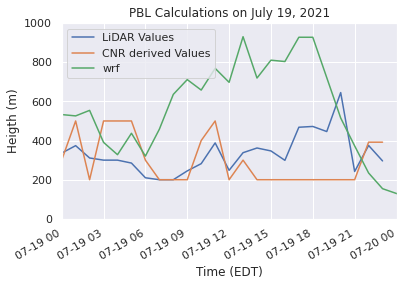

In [77]:
sns.set()
plt.plot(std_pbl_li_H, label = "LiDAR Values")
plt.plot(pblh["time"],pblh['PBL_H_CNR'], label = "CNR derived Values")
plt.title("PBL Calculations on July 19, 2021")
plt.ylabel("Heigth (m)")
plt.xlabel("Time (EDT)")
plt.plot(wrf.local, wrf.MixHgt, label = 'wrf')
plt.legend()
fig = plt.gcf()
d1 = datetime.datetime(2021,7,19)
d2 = datetime.datetime(2021,7,20)
ax = plt.gca()
ax.set_xlim(d1,d2)
ax.set_ylim(0,1000)
fig.autofmt_xdate()
plt.show()

Many over and under stimations the code logic need review

In [71]:
wname = 'wrf27vmixing.csv'
wrf = pd.read_csv(wname,parse_dates=['date'])
wrf.sort_values('date', inplace=True)
# convert to local time
wrf['local'] = wrf['date'] - datetime.timedelta(hours=4)

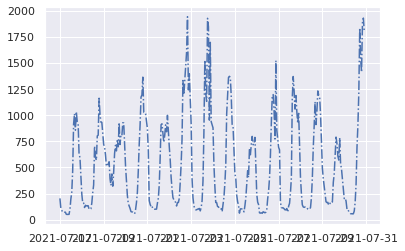

In [62]:
plt.plot(wrf.date.values, wrf.MixHgt.values,'-.')
plt.show()

In [51]:
wrf.date.values

array(['2021-07-17 00:00:00', '2021-07-17 01:00:00',
       '2021-07-17 02:00:00', '2021-07-17 03:00:00',
       '2021-07-17 04:00:00', '2021-07-17 05:00:00',
       '2021-07-17 06:00:00', '2021-07-17 07:00:00',
       '2021-07-17 08:00:00', '2021-07-17 09:00:00',
       '2021-07-17 10:00:00', '2021-07-17 11:00:00',
       '2021-07-17 12:00:00', '2021-07-17 13:00:00',
       '2021-07-17 14:00:00', '2021-07-17 15:00:00',
       '2021-07-17 16:00:00', '2021-07-17 17:00:00',
       '2021-07-17 18:00:00', '2021-07-17 19:00:00',
       '2021-07-17 20:00:00', '2021-07-17 21:00:00',
       '2021-07-17 22:00:00', '2021-07-18 00:00:00',
       '2021-07-18 01:00:00', '2021-07-18 02:00:00',
       '2021-07-18 03:00:00', '2021-07-18 04:00:00',
       '2021-07-18 05:00:00', '2021-07-18 06:00:00',
       '2021-07-18 07:00:00', '2021-07-18 08:00:00',
       '2021-07-18 09:00:00', '2021-07-18 10:00:00',
       '2021-07-18 11:00:00', '2021-07-18 12:00:00',
       '2021-07-18 13:00:00', '2021-07-18 14:0